# Sistemas Inteligentes

## Exercício Computacional 1 - Classificação

Neste laboratório serão explorados os classificadores **KNN** e **Decision Tree**. Também vamos explorar a métrica de **Acurácia** e conhecer a **Confusion Matrix**.

### Identificação do Aluno

#### Nome Completo

Daniel Escudero

#### RA

11005716

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **digits_dataset**.

In [17]:
import sklearn.datasets as datasets
digits_dataset = datasets.load_digits()

Tendo feito o processo adequadamente, a variável **digits_dataset** conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável **digits_img** apenas o objeto **images** de **digits_dataset**.

In [8]:
digits_img = digits_dataset.images

Verifique o formato de **digits_img**.

In [16]:
import numpy as np
np.shape(digits_img)

(1797, 8, 8)

Imprima **digits_img** para que seja possível ver como são os dados que temos no momento.

In [14]:
print(digits_img)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

Sabendo que esta estrutura se refere a um conjunto de imagens, pode ser interessante imprimir ao menos uma ou duas para visualizarmos como é o seu padrão.

Para fazer isso, importe o pacote de funções **pyplot** da biblioteca **matplotlib**. Apesar de não ser obrigatório, para facilitar, recomenda-se utilizar um "apelido" para esse tipo de pacote com nome tão grande, a fim de tornar o seu uso mais prático. É comum utilizar o termo "plt" para o pyplot, mas você pode chamar como preferir.

In [19]:
import matplotlib.pyplot as plt

Depois de importar o pacote, utilize a função **imshow()** do **pyplot** para imprimir na tela uma das imagens contidas em **digits_img**.

Obs: caso tenha sido utilizado um apelido na importação do pacote, lembre-se dele quando for chamar suas funções, como é o caso agora.

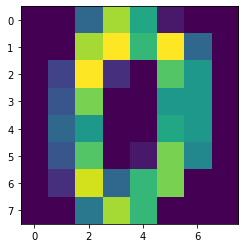

In [87]:
plt.imshow(digits_img[0])

Apesar de esse tipo de formato permitir que essas imagens sejam elegantemente exibidas a nós, humanos, não se trata de um formato tão interessante para se efetuar processamentos computacionais. Por isso, faça uma mudança no formato da estrutura utilizando a função **reshape()** da biblioteca **numpy**. Como tal biblioteca ainda não for importada, comece por sua importação, preferencialmente utilizando o apelido "np" para tornar mais prática a sua utilização.

In [88]:
# numpy foi importada na celula 16, para verificar o formato das imagens

Agora, com a biblioteca já importada, utilize a função **reshape()** para forçar um formato unidimensional para cada imagem dentro da matriz original.

Note que o número de imagens não pode ser alterado, tampouco as imagens em si; apenas o formato da representação de cada uma dessas imagens pode sofrer alteração.

In [91]:
digits_img = np.reshape(digits_img, (1797, 64))

Agora verifique se o novo formato está como desejava-se obter. Se o novo formato for bidimensional, o número de imagens for o mesmo que o original e o número de pixels for o mesmo que o original, então está correto.

In [92]:
np.shape(digits_img)

(1797, 64)

Agora que já temos os dados de entrada adequadamente preparados, precisamos dos dados de saída correspondentes. Então, atribua o objeto **target** de **digits_dataset** à variável **digits_target**.

In [93]:
digits_targets = digits_dataset.target

Imprima **digits_target** para visualizar como são esses dados

In [94]:
digits_targets

array([0, 1, 2, ..., 8, 9, 8])

Agora imprima o formato de **digits_target** para saber exatamente as suas dimensões.

In [95]:
np.shape(digits_targets)

(1797,)

#### Divisão dos dados em grupos para treinamento e teste.

Importe a função **train_test_split()** do pacote **model_selection**, pertencente à biblioteca **sklearn**.

In [96]:
from sklearn.model_selection import train_test_split

Agora, utilizando a função **train_test_split()**, divida os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split()**.

In [97]:
x_train, x_test, y_train, y_test = train_test_split(digits_img, digits_targets, test_size=0.25, random_state=1111)

Imprima, em diferentes células, o formato de cada uma das partes obtidas.

In [98]:
np.shape(x_train)

(1347, 64)

In [99]:
np.shape(x_test)

(450, 64)

In [100]:
np.shape(y_train)

(1347,)

In [101]:
np.shape(y_test)

(450,)

### K-Nearest Neighbors (KNN)

#### Treinamento

Importe o classificador do KNN, que é uma função chamada **KNeighborsClassifier** do pacote **neighbors**, que faz parte da biblioteca **sklearn**.

In [102]:
from sklearn.neighbors import KNeighborsClassifier

Agora crie o classificador com o nome **knn** utilizando para o argumento *n_neighbors* da função **KNeighborsClassifier** o número de vizinhos próximos que serão considerados pelo algoritmo. Lembre-se de preferir um número ímpar não muito grande.

In [103]:
knn = KNeighborsClassifier(5)

Treine o classificador **knn** por meio de sua própria função **fit()**, atribuindo o resultado ao próprio **knn**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **x_train** e **y_train**.

In [104]:
knn = knn.fit(x_train, y_train)

#### Classificação

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **knn**. O argumento da função é apenas a entrada de teste, ou seja, **x_test**. Atribua a saída dessa classificação à variável **y_pred**.

In [105]:
y_pred = knn.predict(x_test)

#### Resultados

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**.

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix

Comece utilizando a função **accuracy_score** para calcular a acurácia do classificador. Esta é uma das mais comuns métricas para se verificar o desempenho do classificador. O primeiro argumento da função é o conjunto de saídas esperadas, ou seja, **y_test**; o segundo, o conjunto de saídas obtidas pela predição do classificador utilizado, ou seja, **y_pred**.

In [107]:
accuracy_score(y_test, y_pred)

0.9911111111111112

Gere a matriz de confusão utilizando a função **confusion_matrix**.

In [108]:
confusion_matrix(y_test, y_pred)

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 48,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 36]])

### Decision Tree

#### Treinamento

In [110]:
from sklearn.tree import DecisionTreeClassifier

Assim como foi feito com o KNN, crie um classificador de Decision Tree chamado **dt** utilizando agora a função **DecisionTreeClassifier**.

In [111]:
dt = DecisionTreeClassifier()

Treine classificador **dt** utilizando a função **fit** com os dados de treinamento, **x_train** e **y_train**, respectivamente.

In [114]:
dt = dt.fit(x_train, y_train)

#### Classificação

Faça a classificação dos dados de entrada para testes, **x_test**, utilizando a função **predict** do próprio **dt** e armazene os resultados em **y_pred**.

In [115]:
y_pred = dt.predict(x_test)

#### Resultados

Verifique a acurácia do classificador **dt** por meio da função **accuracy_score**.

In [116]:
accuracy_score(y_test, y_pred)

0.8311111111111111

Mostre a matriz de confusão do classificador **dt** utilizando a função **confusion_matrix**.

In [117]:
confusion_matrix(y_test, y_pred)

array([[37,  0,  2,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 41,  1,  1,  3,  0,  0,  1,  0,  1],
       [ 1,  3, 33,  0,  0,  0,  1,  0,  5,  0],
       [ 0,  1,  3, 41,  0,  1,  0,  1,  0,  1],
       [ 0,  1,  0,  0, 46,  1,  3,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  1,  1,  1],
       [ 1,  3,  1,  0,  3,  0, 42,  0,  0,  0],
       [ 0,  1,  0,  0,  2,  0,  0, 43,  0,  3],
       [ 0,  3,  3,  4,  2,  0,  0,  0, 29,  2],
       [ 1,  0,  2,  1,  0,  4,  0,  2,  1, 25]])

## Questões

### 1. O que você entende por "acurácia"? Esta métrica é suficiente para avaliar o desempenho de um classificador? Se não, o que mais poderia ser utilizado? E por que?

A acurácia é a porcentagem dentre todo o espaço de predições. A métrica é válida para ter uma noção do desempenho de um preditor, mas não deve ser a única utilizada. Outras métricas válidas são a precisão (porcentagem de exemplos classificados com a classe X dentre os exemplos que de fato são da classe X), a revocação (porcentagem de exemplos classificados corretamente com a classe X dentre todos os exemplos classificados como X), e a métrica F1 Score, que combina a precisão com a revocação na fórmula: (2 * precisao * revocacao) / (precisao + revocacao).
Essas outras métricas são mais importantes de acordo com a aplicação em que o classificador está sendo usado, uma vez que em certas aplicações (por exemplo) um falso positivo é muito mais crítico do que um falso negativo.

### 2. Que tipo de informação a matriz de confusão oferece sobre o classificador?

A matriz de confusão oferece informações sobre quais dados foram confundidos com quais rótulos. Oferece também visualmente uma forma de visualizar as quantidades de falsos positivos, falsos negativos, verdadeiros positivos e verdadeiros negativos.

### 3. O que representa cada linha dessa matriz? E cada coluna? E a diagonal principal?

De acordo com a documentação do scikit, as posições (i,j) da matrix de confusão aponta a quantidade de exemplos que pertence à classe i, mas pertence à classe j.
Dessa forma, temos que a soma dos valores da linha i da matrix resulta no número de exemplos da classe i. A soma dos valores da coluna j, por sua vez, resulta no total de exemplos classificados como j. Além disso, os valores da matriz nas posições (i,j) quando i=j mostram os acertos, em que um exemplo da classe X foi classificado corretamente como X.
Dessa forma diagonal principal contém a quantidade de exemplos classificados corretamente. Assim, pode-se somar todos os valores da diagonal principal e dividir pela quantidade de exemplos para obter a acurácia.

### 4. Seria possível avaliar, ainda que superficialmente, o desempenho de um classificador se utilizássemos apenas pixels em escala de cinza para representar os valores de uma matriz de confusão? Por que?

Seria sim possível. A diagonal principal estar mais escura significa que houveram mais acertos do classificador. A matriz estar uniformemente cinza, por sua vez, significa que o classificador cometeu muitos erros, estando com um desempenho ruim.

### 5. Quais critérios você utilizaria para escolher o número de vizinhos do algoritmo KNN? Por que? E como isso pode influenciar no desempenho do algoritmo?

Para escolher o valor de 5, usei um valor impar nao muito grande, maior que 1. Uma alternativa possível é utilizar alguma técnica de validação cruzada para o número de vizinhos como, por exemplo, a técnica k-folds. A estratégia baseia-se em testar vários valores de k em diferentes partições dos dados de teste, e avaliar qual delas tem o melhor desempenho. Então, esse valor de k deverá ser utilizado nos dados de teste. A estratégia pode aumentar drasticamente o desempenho do algoritmo. Valores muito pequenos de K tornam o classificador mais intolerante a dados ruidosos, ao passo que valores grandes de K tornam o classificador pouco treinado, com menor variância e maior viés.

### 6. Algum dos dois classificadores explorados neste laboratório é não paramétrico? Se sim, o que o permite fazer tal afirmação?

A arvore de decisao nao é paramétrica porque sua precisão não depende de nenhum parâmetro além dos dados. O Knn depende do valor de K (número de vizinhos).

### 7. Qual dos dois classificadores se saiu melhor neste laboratório? Por que? Caso fossem utilizados estes mesmos classificadores para classificar digitos de outra base de dados, o classificador com melhor desempenho ainda seria necessariamente o mesmo? Por que?

O knn se saiu melhor nesse laboratório. Outras bases de dados provavelmente também teriam resultado parecido, uma vez que o knn é melhor para esse tipo de problema com muitas dimensões em que dados com rótulos iguais encontram-se próximos no espaço das dimensões do problema.

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)